---
# **データサイエンス基礎　第5回課題**
## **【SSDSE】データフレーム操作の練習**
---
### 1. SSDSEとは
> 　SSDSE（教育用標準データセット：Standardized Statistical Data Set for Education）は，データ分析のための汎用素材として，独立行政法人統計センターが作成・公開している統計データです．主要な公的統計を地域別に一覧できる表形式のデータセットで，直ちにデータ分析に利用することができます．データサイエンス演習，統計教育などにご活用ください．[https://www.nstac.go.jp/use/literacy/ssdse](https://www.nstac.go.jp/use/literacy/ssdse)  
  
　今回は，このSSDSEの2024年度県別推移（[SSDSE-B-2024](https://www.nstac.go.jp/sys/files/SSDSE-B-2024.csv)）をCSV形式でダウンロードしたものを扱い，Python Pandasのデータフレーム操作の練習を行う．
### 2. 各課題への解答
　PDF形式でまとめた解答に関しては，各課題文の内容に対して，必要な範囲で解答した．しかし，プログラムにおいて，各課題の問いに対して必要な範囲で解答するものを作成しても，あまり汎用的ではなく，プログラムで記述するメリットが薄れてしまうと感じた．したがって，こちらのプログラムでは，各課題文の内容よりも汎用的で，必要な範囲を包括する解答をすることができるように改良した．以下に各課題への解答を示す．
#### (1) $XXXX$ 年における人口が $N$ 番目の都道府県を出力

In [2]:
# 基本ライブラリの読み込み
# %pip install --upgrade pip
# %pip install numpy
# %pip install matplotlib
# %pip install pandas
# %pip install seaborn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import seaborn as sns

# CSVファイルをデータフレームにする
df = pd.read_csv('SSDSE-B-2024.csv', header=1)  # 1行目はIDであるため2行目を見出しとして扱う

# 変数を入力
year_XXXX = 2021            # 年度
ranking_N = 5               # 順位

# [都道府県, 総人口]を格納するリスト
prefecture_population = pd.DataFrame(columns=['都道府県', '総人口'])  

# データフレームの始めから終わりまで探索
for index, row in df.iterrows():
    # XXXX年のデータのみ扱う
    if row['年度'] == year_XXXX :
        prefecture_population = pd.concat\
        ([prefecture_population, pd.DataFrame({"都道府県": [row['都道府県']], "総人口": [row['総人口']]})])

# 総人口にしたがってソート
prefecture_population = prefecture_population.sort_values(by="総人口", ascending=False)
# display(prefecture_population)
print(f"{year_XXXX}年における総人口が上位{ranking_N}番目の都道府県：\
{prefecture_population.iloc[ranking_N-1]['都道府県']}（{prefecture_population.iloc[ranking_N-1]['総人口']}人）")


2021年における総人口が上位5番目の都道府県：埼玉県（7340000人）


　したがって，2021年における総人口が5番目である都道府県は <u>**埼玉県**</u> で，734万人であることが分かった．  
　年度や順位を変える場合は，変数の値を変更すれば良い．input() 関数を用いて入力させるのも良いだろう．また，$N$ 番目だけでなく，繰り返しを用いてある範囲を出力することも可能である．  
#### (2) $XXXX$ 年における転入者と転出者の差が上位（下位） $N$ 番目までの都道府県を出力

In [3]:
# 変数を入力
year_XXXX = 2021            # 年度
ranking_N = 1               # 順位

# [都道府県, 転入者 - 転出者]を格納するリスト
prefecture_diffrence = pd.DataFrame(columns=['都道府県', '転入者-転出者'])  

# データフレームの始めから終わりまで探索
for index, row in df.iterrows():
    # XXXX年のデータのみ扱う
    if row['年度'] == year_XXXX :
        prefecture_diffrence = pd.concat\
        ([prefecture_diffrence, pd.DataFrame({"都道府県": [row['都道府県']], \
        "転入者-転出者": [row['転入者数（日本人移動者）'] - row['転出者数（日本人移動者）']]})])

# 転入者 - 転出者にしたがってソート
prefecture_diffrence = prefecture_diffrence.sort_values(by="転入者-転出者", ascending=False)
# display(prefecture_diffrence)
for rank in range(0, ranking_N):
    print(f"{year_XXXX}年における転入者と転出者の差が上位{rank+1}番目の都道府県：\
{prefecture_diffrence.iloc[rank]['都道府県']}\
（{prefecture_diffrence.iloc[rank]['転入者-転出者']}人）")

2021年における転入者と転出者の差が上位1番目の都道府県：神奈川県（28922人）


　したがって，2021年における転入者と転出者の差が最大の都道府県は <u>**神奈川県**</u> で，28922人であることが分かった．  
　上位 $N$ 番目まで出力したい場合は，変数 raiking_N の値を変更すれば良い．また，最小である都道府県を知りたい場合は，ソートの部分で ascending を True にすれば良い．次の大問では，この部分も変数から可変にすることで，扱いやすくしようと思う．
#### (3) $XXXX$ 年から $YYYY$ 年における降水量の合計値が上位 $N$ 番目までの都道府県を出力

In [4]:
# 変数を入力
year_XXXX = 2010            # 開始年度
year_YYYY = 2021            # 終了年度
ranking_N = 1               # 順位
LOWER = False               # 下位から出力する

# [都道府県, 合計降水量]を格納するリスト
prefecture_rainfall = pd.DataFrame(columns=['都道府県', '合計降水量'])  

# データフレームの始めから終わりまで探索
for index, row in df.iterrows():
    # XXXX年からYYYY年までのデータのみ扱う
    df_filtered = df[(year_XXXX <= df['年度']) & (df['年度'] <= year_YYYY)]

    # '-'は0に置き換え，str型からfloat型に変換
    df_filtered['降水量（年間）'] = df_filtered['降水量（年間）'].replace('-', 0).astype(float)

    # 都道府県ごとに降水量の合計を取る
    prefecture_rainfall = df_filtered.groupby('都道府県')['降水量（年間）'].sum().reset_index()

    # 名称変更
    prefecture_rainfall.rename(columns={'降水量（年間）': '合計降水量'}, inplace=True)

# 合計降水量にしたがってソート
prefecture_rainfall = prefecture_rainfall.sort_values(by="合計降水量", ascending=LOWER)
# display(prefecture_rainfall)
for rank in range(0, ranking_N):
    if LOWER :
        print(f"{year_XXXX}年から{year_YYYY}年における合計降水量が下位{rank+1}番目の都道府県：\
{prefecture_rainfall.iloc[rank]['都道府県']}\
（{prefecture_rainfall.iloc[rank]['合計降水量']} mm）")
    else :
        print(f"{year_XXXX}年から{year_YYYY}年における合計降水量が上位{rank+1}番目の都道府県：\
{prefecture_rainfall.iloc[rank]['都道府県']}\
（{prefecture_rainfall.iloc[rank]['合計降水量']} mm）")

2010年から2021年における合計降水量が上位1番目の都道府県：高知県（34551.5 mm）


　したがって，2010年から2021年における合計降水量が最大の都道府県は <u>**高知県**</u> で，34551.5 mmであることが分かった．  
　降順から昇順へ変更するには，変数 LOWER（定数扱い）を True にすれば良く，次の大問にも対応可能である．
#### (4) $XXXX$ 年から $YYYY$ 年における降水量の合計値が下位 $N$ 番目までの都道府県を出力

In [5]:
# 変数を入力
year_XXXX = 2010            # 開始年度
year_YYYY = 2021            # 終了年度
ranking_N = 1               # 順位
LOWER = True                # 下位から出力する

# [都道府県, 合計降水量]を格納するリスト
prefecture_rainfall = pd.DataFrame(columns=['都道府県', '合計降水量'])  

# データフレームの始めから終わりまで探索
for index, row in df.iterrows():
    # XXXX年からYYYY年までのデータのみ扱う
    df_filtered = df[(year_XXXX <= df['年度']) & (df['年度'] <= year_YYYY)]

    # '-'は0に置き換え，str型からfloat型に変換
    df_filtered['降水量（年間）'] = df_filtered['降水量（年間）'].replace('-', 0).astype(float)

    # 都道府県ごとに降水量の合計を取る
    prefecture_rainfall = df_filtered.groupby('都道府県')['降水量（年間）'].sum().reset_index()

    # 名称変更
    prefecture_rainfall.rename(columns={'降水量（年間）': '合計降水量'}, inplace=True)

# 合計降水量にしたがってソート
prefecture_rainfall = prefecture_rainfall.sort_values(by="合計降水量", ascending=LOWER)
# display(prefecture_rainfall)
for rank in range(0, ranking_N):
    if LOWER :
        print(f"{year_XXXX}年から{year_YYYY}年における合計降水量が下位{rank+1}番目の都道府県：\
{prefecture_rainfall.iloc[rank]['都道府県']}\
（{prefecture_rainfall.iloc[rank]['合計降水量']} mm）")
    else :
        print(f"{year_XXXX}年から{year_YYYY}年における合計降水量が上位{rank+1}番目の都道府県：\
{prefecture_rainfall.iloc[rank]['都道府県']}\
（{prefecture_rainfall.iloc[rank]['合計降水量']} mm）")

2010年から2021年における合計降水量が下位1番目の都道府県：長野県（12183.0 mm）


　したがって，2010年から2021年における合計降水量が最小の都道府県は <u>**長野県**</u> で，12183.0 mmであることが分かった．  
　以上のコードは，汎用化を目的として改良したわけであるが，再利用する際に，コピペするのでは少しもったいない．それぞれのコードは共通の部分があるので，それらを関数として定義し，同じ内容を何回も書かないようにするべきであった．
#### (5) 埼玉県における学校教育の状況を考察（教員対生徒比，進学率などに基づき，関東の他県と比較）

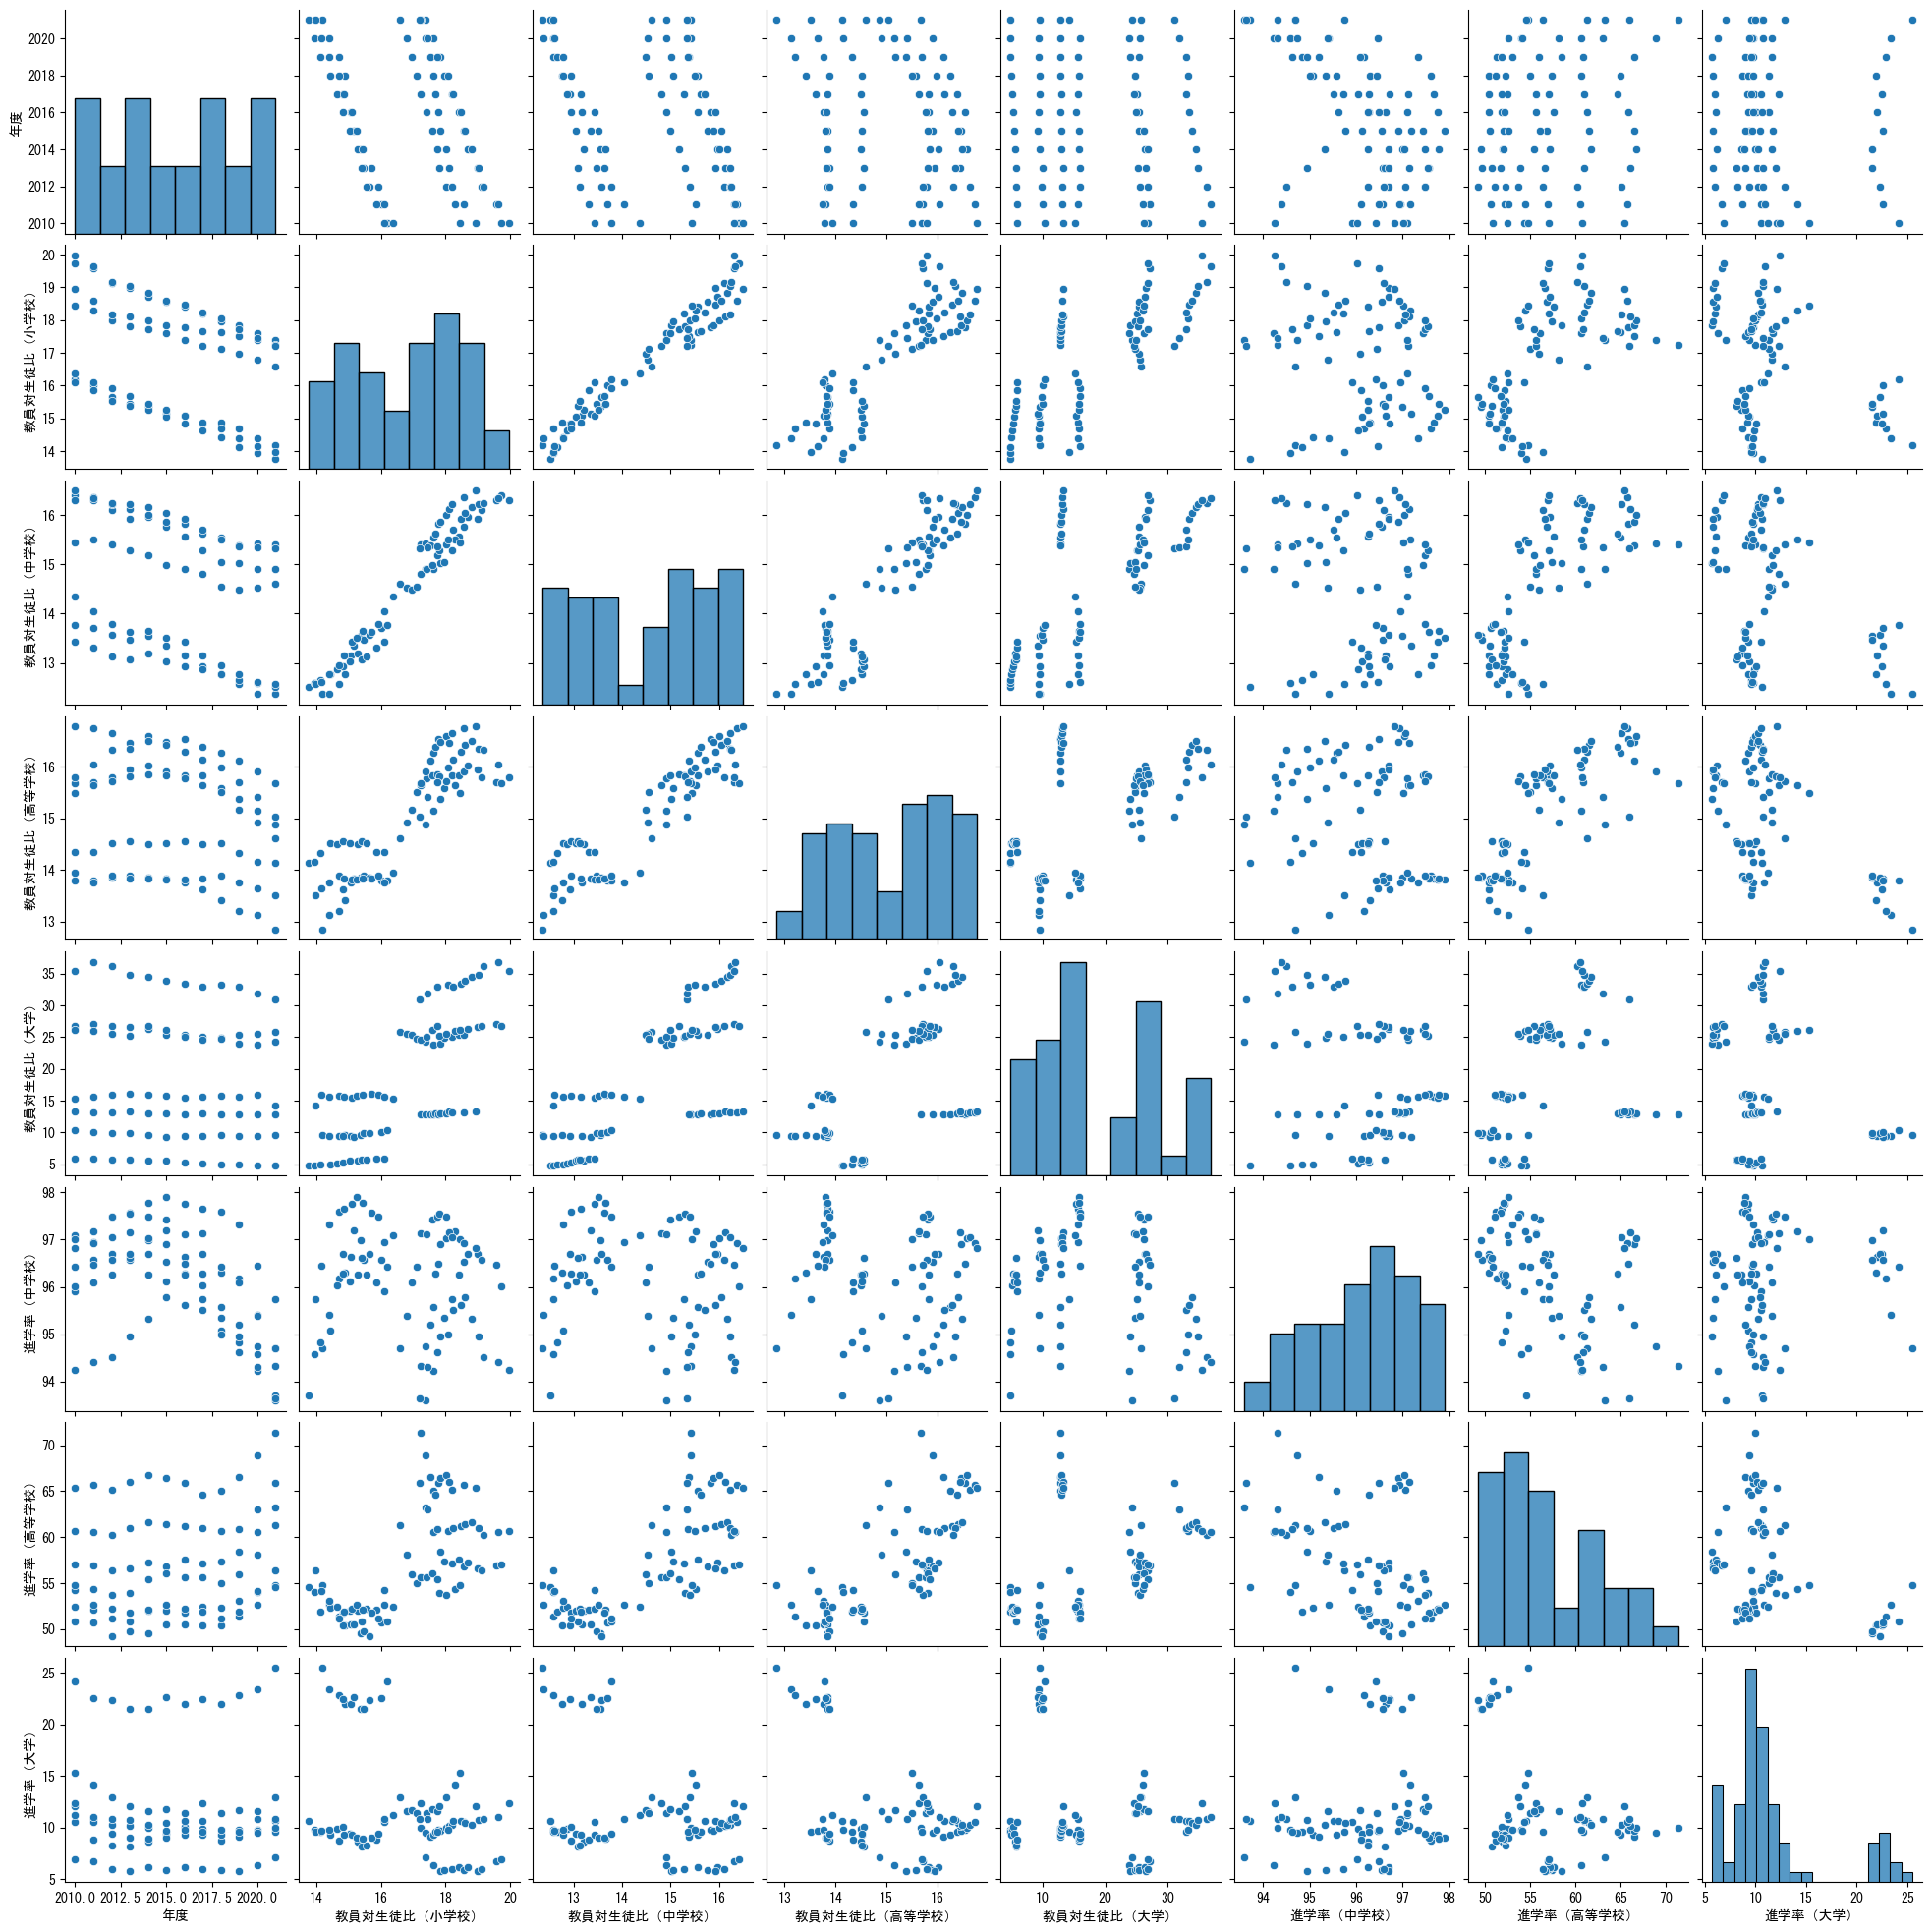

In [6]:
# 変数を入力
year_XXXX = 2010            # 開始年度
year_YYYY = 2021            # 終了年度
ranking_N = 1               # 順位

# 関東地方の都道府県のリスト
KANTO = ['茨城県', '千葉県', '東京都', '埼玉県', '群馬県', '栃木県', '神奈川県']

# [年度, 都道府県, 教員対生徒比（小中高大）, 進学率（中高大）]を格納するリスト
prefecture_education = [] 

# データフレームの始めから終わりまで探索
for index, row in df.iterrows():
    # XXXX年からYYYY年までかつ関東地方の都道府県のデータのみ扱う
    if (year_XXXX <= row['年度'] <= year_YYYY) and (row['都道府県'] in KANTO) :
        prefecture_education.append({"年度": row['年度'], \
                                    "都道府県": row['都道府県'], \
                                    "教員対生徒比（小学校）": row['小学校児童数'] / row['小学校教員数'], \
                                    "教員対生徒比（中学校）": row['中学校生徒数'] / row['中学校教員数'], \
                                    "教員対生徒比（高等学校）": row['高等学校生徒数'] / row['高等学校教員数'], \
                                    "教員対生徒比（大学）": row['大学学生数'] / row['大学教員数'], \
                                    "進学率（中学校）": row['中学校卒業者のうち進学者数'] / row['中学校卒業者数'] * 100, \
                                    "進学率（高等学校）": row['高等学校卒業者のうち進学者数'] / row['高等学校卒業者数'] * 100, \
                                    "進学率（大学）": row['大学卒業者のうち進学者数'] / row['大学卒業者数'] * 100 })

prefecture_education = pd.DataFrame(prefecture_education)
# display(prefecture_education)

# ペアプロットを作成
plt.rcParams['font.family'] = 'MS Gothic'
sns.pairplot(prefecture_education)
plt.show()

　練習も兼ねて，何となくでペアプロットを表示したが，あまり意味はない．明らかに正の相関が見れれる部分から言えることは，”小学校における教員1人当たりの生徒数は，中学校における教員1人当たりの生徒数と比例関係がある”という今回の課題には無関係なものばかりである．ただし，1列目の結果は，年度ごとの諸値の推移を意味し，関東地方における諸値の変化の傾向が読み取れる．小中学校における教員1人当たりの生徒数は減少傾向で，高校においても一定か若干の減少傾向が見られる．  
　したがって，この1列目のプロットを都道府県ごとに色分けして，比較するべきであると考えられる．

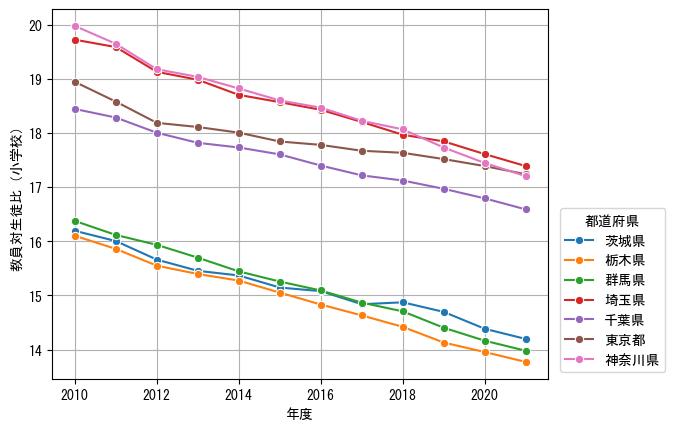

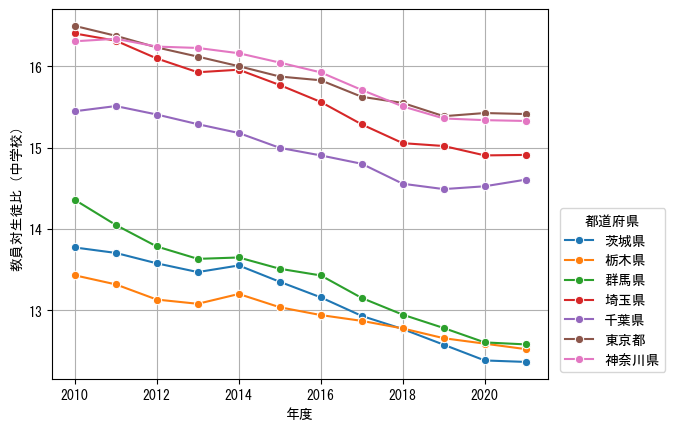

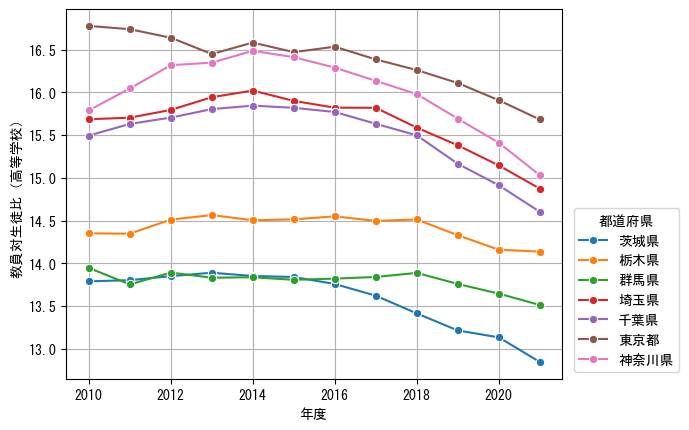

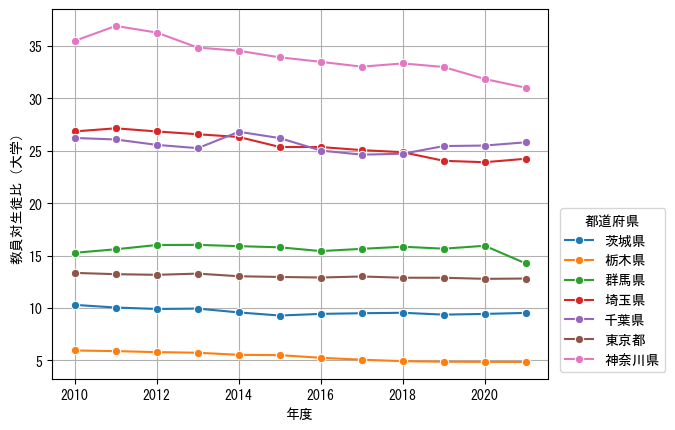

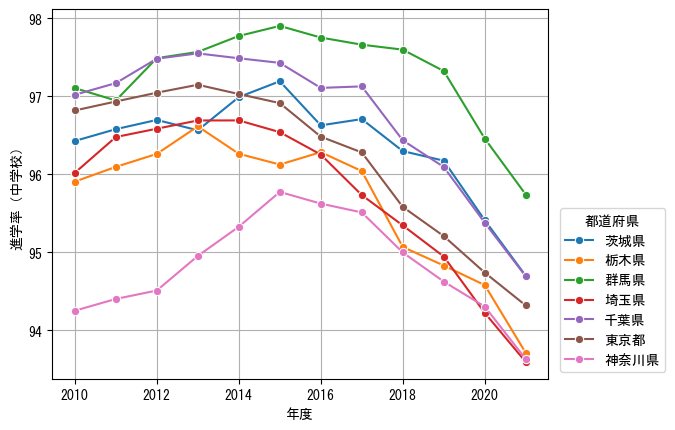

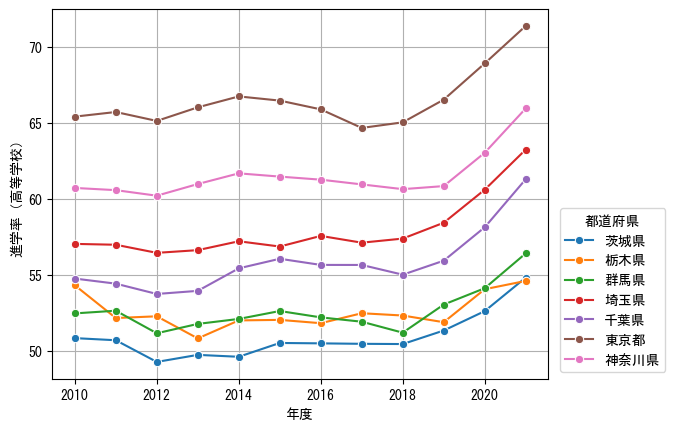

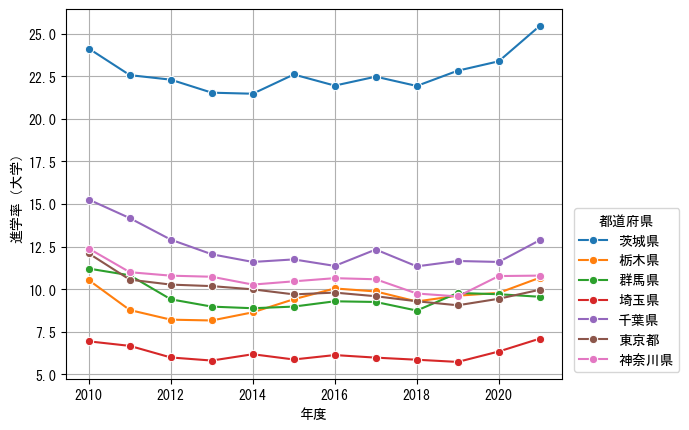

In [14]:
# グラフにしたい項目
columns = ["教員対生徒比（小学校）", "教員対生徒比（中学校）", "教員対生徒比（高等学校）", "教員対生徒比（大学）", \
           "進学率（中学校）", "進学率（高等学校）", "進学率（大学）"]

# 7つのグラフをそれぞれ描画
for col in columns:
    plt.figure()
    plt.rcParams['font.family'] = 'MS Gothic'
    sns.lineplot(data=prefecture_education, x='年度', y=col, hue='都道府県', marker='o')
    plt.xlabel('年度')
    plt.ylabel(col)
    plt.legend(title='都道府県', loc='lower right', bbox_to_anchor=(1.25, 0))
    plt.grid(True)
    plt.show()

　小学校教育に関して，埼玉県における教員1人当たりの生徒数は，年々減少しており，2010年から2021年にかけておよそ2人減少している．これは，教員にかかる負担が減少していることを意味していると考えられ，良い傾向であると言える．他県と比較すると，その値や減少の傾きがほぼ同程度であり，埼玉県の小学校教育においては，良い意味でも悪い意味でも，他県との差がないと言える．  
　中学校教育に関して，埼玉県における教員1人当たりの生徒数は，小学校におけるそれと同様に年々減少しており，2010年から2021年にかけておよそ1人減少している．他県と比較すると，2010年の段階で値が近かった東京都と神奈川県よりも，減少の傾きが大きく，相対的にも教員の負担が軽減していることから，学校教育の質は向上するものと推定される．しかし，教員の負担が軽減されても，必ずしもその分だけ教育の質が向上するとは限らないことに注意が必要である．また，進学率に関しては，9割以上と高く，他県と比較しても同程度ではあるが，2020年および2021年においては，関東で最下位である．  
　高校教育に関して，埼玉県における教員1人当たりの生徒数は，2010年から2021年にかけておよそ1人減少している．他県と比較しても同程度か，他県はほぼ一定である．進学率に関しては，およそ 5 % 上昇している．他県も同程度上昇しており，東京都，神奈川県に続き関東で3位である．  
　大学教育に関して，埼玉県における教員1人当たりの生徒数は，ほぼ一定で，東京都と同程度である．他県もこの値はほぼ一定である．また，進学率に関しては，埼玉県が常に最下位である．ただし，これは大学院への進学率であり，必ずしも欠点であるとは言えないことに注意が必要である．
  
　総じて，他県との傑出した欠点が見られないことから，埼玉県における学校教育の状況は，”非常に安定している”と評価することができる．また，大学院への進学率が低いことから，学校教育の結果，それが研究成果として還元されるというよりは，社会活動として還元されているものと推定される．したがって，将来の日本のために，専門教育への投資が有効であると考えられるほか，普通教育でも社会応用を視野に入れた教育が有効であると考えられる．

### 感想  
　今回は，seabornによるペアプロットを試した．データフレームを引数にほぼ1行で書くことができ，想像よりも楽であった．機械学習などで，説明変数を選定する際などに便利であると思った．また，その他のデータ可視化メソッドとして，バイオリンプロットやヒートマップ，クラスタマップなどがあり，研究発表などの機会では，適材適所で活用していきたいと感じた．